In [52]:
import numpy as np
import pandas as pd
import folium as fl
from geotext import GeoText
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyApp",timeout=10)
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [53]:
books = pd.read_csv('Books.csv',low_memory=False)
users = pd.read_csv('Users.csv',low_memory=False)
ratings = pd.read_csv('Ratings.csv',low_memory=False)

In [54]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [55]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [56]:
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [57]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [58]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [59]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [60]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Age is not important

In [61]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [62]:
books.duplicated().sum()

0

In [63]:
ratings.duplicated().sum()

0

In [64]:
users.duplicated().sum()

0

In [65]:
books['Book-Title'].nunique()

242135

In [66]:
books.shape

(271360, 8)

In [67]:
Book_Count_df=pd.DataFrame(books['Book-Title'].value_counts())

In [68]:
Book_Count_df.reset_index(inplace=True)

In [69]:
Book_Count_df.rename(columns={'index':'Book-Title','Book-Title':'Count'})

,Book-Title,Count
0,Selected Poems,27
1,Little Women,24
2,Wuthering Heights,21
3,The Secret Garden,20
4,Dracula,20
...,...,...
242130,What Every Kid Should Know,1
242131,The Seventh Enemy (A Brady Coyne Mystery),1
242132,A Brace of Skeet,1
242133,"The Yellow Admiral (O'Brian, Patrick, Aubrey/Maturin Novels, 18.)",1


We observe that there are multiple rows in books dataframe for the same book.  
Hence we would drop duplicate entries using the Book-Title column and only select rows with unique Book-Titles.

In [70]:
User_Rating_Count=pd.DataFrame(ratings['User-ID'].value_counts())

In [71]:
User_Rating_Count.reset_index(inplace=True)

In [72]:
User_Rating_Count.rename(columns={'index':'User-ID','User-ID':'Count'},inplace=True)
User_Rating_Count

,User-ID,Count
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850
...,...,...
105278,116180,1
105279,116166,1
105280,116154,1
105281,116137,1


small group of people have given ratings to large number of books
selecting these set of users who have rated more books will help in developing efficient system

In [73]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [74]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [75]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [76]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [77]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)

In [78]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [79]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [80]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 1000)

In [81]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg,278,5.737410
9,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.01.MZZZZZZZ.jpg,281,5.007117
17,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.01.MZZZZZZZ.jpg,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.01.MZZZZZZZ.jpg,510,4.700000


These are the most popular books

In [82]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
x

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [83]:
wellread_users = x[x].index

In [84]:
wellread_users.shape

(811,)

In [85]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(wellread_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1880837927.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1880837927.01.LZZZZZZZ.jpg
1030884,275970,188717897X,0,"The Ordeal of Integration: Progress and Resentment in America's \Racial\"" Crisis (Ordeal of Integration)""",Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/188717897X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/188717897X.01.LZZZZZZZ.jpg
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejections,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1888889047.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1888889047.01.LZZZZZZZ.jpg
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventures of a Mountain Man Wannabe (Capital Discoveries Book),Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931868123.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931868123.01.LZZZZZZZ.jpg


In [86]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=40
y

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [87]:
famous_books = y[y].index
famous_books

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1056)

In [88]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [89]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204 Rosewood Lane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [90]:
pt.isna().sum()

User-ID
254        993
2276      1015
2766       999
2977      1034
3363       955
          ... 
274308     884
275970     946
277427     942
277639    1019
278418     857
Length: 810, dtype: int64

In [91]:
pt.fillna(0,inplace=True)

In [92]:
from sklearn.metrics.pairwise import cosine_similarity

In [93]:
similarity_scores = cosine_similarity(pt)

In [94]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    if index.size == 0:
        return None
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    ISBN_list = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        data.append(item)
    return data

In [95]:
recommend("24 Hours")

[['Doomsday Book', 'Connie Willis'],
 ['The Day After Tomorrow', 'Whitley Strieber'],
 ['The Honk and Holler Opening Soon', 'Billie Letts'],
 ['The Little Friend', 'Donna Tartt'],
 ['Politically Correct Bedtime Stories: Modern Tales for Our Life and Times',
  'James Finn Garner']]

In [99]:
from flask import Flask,render_template,request
from werkzeug.wrappers import Request, Response

In [103]:
app = Flask(__name__)
app.secret_key = "secret"

@app.route('/',methods = ['GET','POST'])
def index():
    return render_template("mi.html")
#  ,, 
@app.route('/server',methods = ['GET','POST'])
def server():
    if request.method == "POST":
        book = request.form['reco']
        print(book)
        data = recommend(book)
        return render_template("mi.html",data = data)

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 8080, app)

 * Running on http://localhost:8080
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://localhost:8080
Press CTRL+C to quit
INFO:werkzeug:Press CTRL+C to quit
127.0.0.1 - - [12/Apr/2023 14:07:54] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2023 14:07:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2023 14:07:54] "GET /static/styles/mi.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2023 14:07:54] "GET /static/styles/mi.css HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2023 14:07:54] "GET /static/styles/hi.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2023 14:07:54] "GET /static/styles/hi.jpeg HTTP/1.1" 200 -
127.0.0.1 - - [12/Apr/2023 14:07:55] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2023 14:07:55] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [12/Apr/2023 14:08:06] "POST /server HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/

24 Hours


127.0.0.1 - - [12/Apr/2023 14:08:06] "GET /static/styles/mi.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2023 14:08:06] "GET /static/styles/mi.css HTTP/1.1" 304 -
127.0.0.1 - - [12/Apr/2023 14:08:29] "POST /server HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2023 14:08:29] "POST /server HTTP/1.1" 200 -


The Day After Tomorrow


127.0.0.1 - - [12/Apr/2023 14:08:29] "GET /static/styles/mi.css HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2023 14:08:29] "GET /static/styles/mi.css HTTP/1.1" 304 -
127.0.0.1 - - [12/Apr/2023 14:08:29] "GET /static/styles/hi.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [12/Apr/2023 14:08:29] "GET /static/styles/hi.jpeg HTTP/1.1" 304 -


In [96]:
def locator(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    ISBN_list = []
    for i in similar_items:
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        temp_list = temp_df["ISBN"].tolist()
        ISBN_list += temp_list
    user_list = (ratings[ratings["ISBN"].isin(ISBN_list)])["User-ID"].tolist()
    place_list = (users[users["User-ID"].isin(user_list)])["Location"].tolist()
    city_list = []
    for i in place_list:
        city_list.append(i.split(",")[1])
    city_list = [x.strip(' ') for x in city_list]
    city_list = [i for i in city_list if i not in ['','n/a','co']]
    city_list = [' '.join(elem.capitalize() for elem in string.split()) for string in city_list]
    lon = []
    lat = []
    for i in city_list:
        location = geolocator.geocode(i)
        if location != None:
            lat.append(location.latitude)
            lon.append(location.longitude)
    lon_lat = pd.DataFrame({
        'Longitude':lon,
        'Latitude':lat
    })
    geometry = [Point(xy) for xy in zip(lon_lat['Longitude'], lon_lat['Latitude'])]
    gdf = GeoDataFrame(lon_lat, geometry=geometry)   
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
    

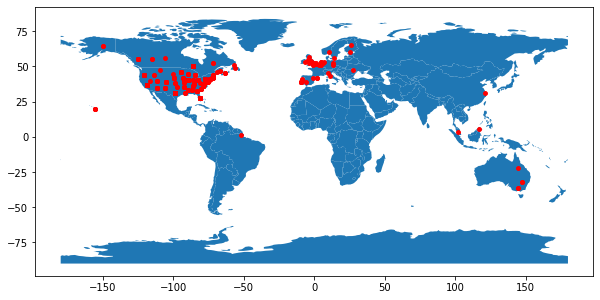

In [98]:
locator("24 Hours")

In [ ]:
city = []
full_city = users["Location"].to_list()
print(full_city)
# for i in full_city:
#     city.append(i.split(",")[1])
# city = [x.strip(' ') for x in city]
# city = [' '.join(elem.capitalize() for elem in string.split()) for string in city]

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

